## import library

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split


## Import Dataset

In [99]:
bike=pd.read_csv("day.csv")

### Exploring Data

In [100]:
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [101]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [102]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [103]:
# check shape of Data
bike.shape

(730, 16)

## Data Quality Check

#### Check for Null / Missing values

In [104]:
# percentage of missing values in each column 
percent_missing = bike.isnull().sum() * 100 / len(bike)
percent_missing

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [105]:
# percentage of missing values in each row
percent_missing=bike.isnull().sum(axis=1)*100/len(bike)
percent_missing

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64


#### FindingThere are no missing / Null values either in columns or rows

 ### Data Cleaning Removing redundant & unwanted columns

#### Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1.instant : Its only an index value

2.dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

3.casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

4.We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [106]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [107]:
bike_new=bike[[ 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [108]:
bike_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [109]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Spliting The Data

In [110]:
df_train,df_test=train_test_split(bike_new,train_size=0.70,test_size=0.30,random_state=33)

In [111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 577 to 391
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    int64  
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    int64  
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    int64  
 7   temp        510 non-null    float64
 8   atemp       510 non-null    float64
 9   hum         510 non-null    float64
 10  windspeed   510 non-null    float64
 11  cnt         510 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 51.8 KB


In [112]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 607 to 200
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      219 non-null    int64  
 1   yr          219 non-null    int64  
 2   mnth        219 non-null    int64  
 3   holiday     219 non-null    int64  
 4   weekday     219 non-null    int64  
 5   workingday  219 non-null    int64  
 6   weathersit  219 non-null    int64  
 7   temp        219 non-null    float64
 8   atemp       219 non-null    float64
 9   hum         219 non-null    float64
 10  windspeed   219 non-null    float64
 11  cnt         219 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 22.2 KB


### Rescaling The Features

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [114]:
# Checking the values before scaling
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
577,3,1,8,0,3,1,1,29.417500,33.36540,67.7500,9.458993,7580
683,4,1,11,0,4,1,2,13.188347,16.22460,62.0417,10.250129,5445
657,4,1,10,0,6,0,1,19.850847,23.64210,57.2917,7.874979,8090
306,4,0,11,0,4,1,1,16.741653,20.29605,70.2083,9.166739,3974
583,3,1,8,0,2,1,2,30.169153,34.88105,70.3750,7.832836,7273


In [115]:
# Apply scaler() to all the numeric variables
num_var=['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_var] = scaler.transform(df_test[num_var])

In [116]:
# After Rescaling traing Dataset
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
577,3,1,8,0,3,1,1,0.811368,0.765180,0.696658,0.212561,0.869535
683,4,1,11,0,4,1,2,0.293449,0.301437,0.637961,0.237946,0.623907
657,4,1,10,0,6,0,1,0.506068,0.502117,0.589118,0.161736,0.928210
306,4,0,11,0,4,1,1,0.406845,0.411590,0.721936,0.203184,0.454671
583,3,1,8,0,2,1,2,0.835355,0.806186,0.723650,0.160384,0.834215



## Building A Linear Model

In [117]:
y_train = df_train.pop('cnt')
x_train = df_train
y_test = df_test.pop('cnt')
x_test = df_test


In [118]:
# train model
lm=LinearRegression()
lm.fit(x_train, y_train)
 

LinearRegression()

In [119]:
y_pred=lm.predict(x_test)

In [120]:
y_pred

array([ 0.86950163,  0.49969574,  0.7043552 ,  0.53521088,  0.50138852,
        0.40309157,  0.51665474,  0.40162484,  0.54808201,  0.34405619,
        0.42768408,  0.74213361,  0.77586441,  0.7030814 ,  0.46220577,
        0.0906224 ,  0.12606579,  0.5717197 ,  0.71951061,  0.91791589,
        0.34812189,  0.58612892,  0.13501593,  0.58060571,  0.10028173,
        0.25285564,  0.32746682,  0.51847392,  0.0785289 ,  0.45763055,
        0.39083188,  0.79804789,  0.47323693,  0.09896407,  0.52148799,
        0.67252961,  0.53368476,  0.2692765 ,  0.77690492,  0.48261288,
        0.23656343,  0.15403843,  0.64215014,  0.37561951,  0.40333434,
        0.30611764,  0.39058166,  0.50497489,  0.51170464,  0.64895875,
        0.60252905,  0.7850889 ,  0.33355031,  0.1452982 ,  0.51571817,
        0.52753648,  0.89341135,  0.36458925,  0.36836495,  0.28472462,
        0.35699961,  0.29137546,  0.26865771,  0.50775122,  0.32953989,
        0.68842356,  0.45168651,  0.42679931,  0.64045518,  0.47

### Plot Model

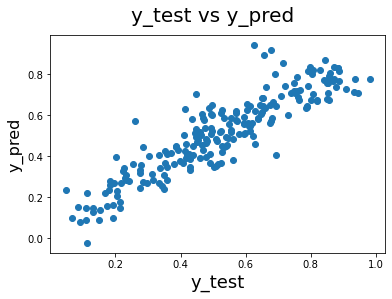

In [124]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [137]:
x_test=np.array(x_test)
x_test

array([[ 3.        ,  1.        ,  8.        , ...,  0.79506465,
         0.60411311,  0.27136711],
       [ 4.        ,  0.        ,  9.        , ...,  0.62598784,
         0.88688946,  0.07756297],
       [ 2.        ,  1.        ,  5.        , ...,  0.5670366 ,
         0.37060874,  0.41842227],
       ...,
       [ 1.        ,  0.        ,  3.        , ...,  0.2715526 ,
         0.43273316,  0.16842807],
       [ 4.        ,  1.        , 10.        , ...,  0.61828937,
         0.65424165,  0.06551526],
       [ 3.        ,  0.        ,  7.        , ...,  0.87277981,
         0.72707763,  0.15373847]])

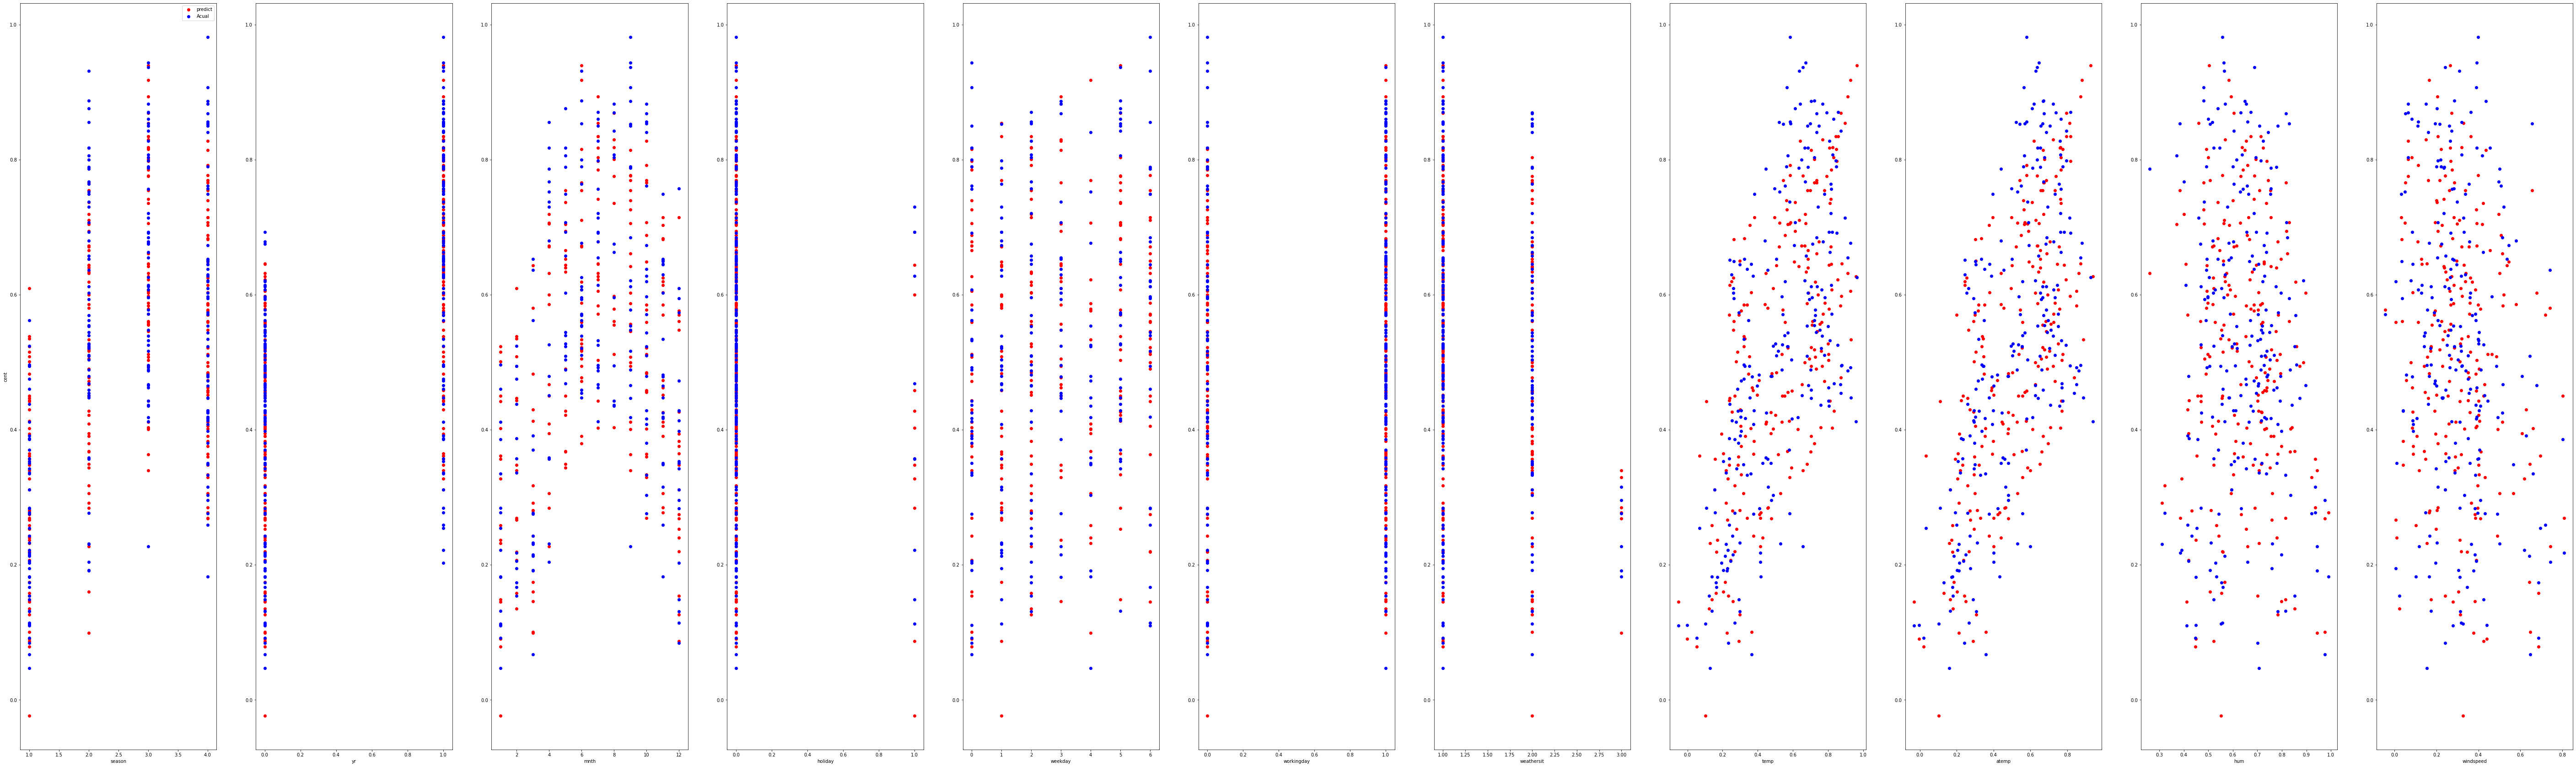

In [145]:
columns=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
fig,ax=plt.subplots(1,11,figsize=(100,30))
for i in range(len(ax)):
    ax[i].scatter(x_test[:,i],y_pred,label="predict",c='r')
    ax[i].set_xlabel(columns[i])
    ax[i].scatter(x_test[:,i],y_test,label="Acual",c="b")
    
ax[0].set_ylabel("cent")
ax[0].legend()
    
    